In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("monthly-cola-production-in-austr.csv")
df["Date"] = df["Month"].astype(str) + "-01"
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace = True)
temp_df = df.drop(columns = ['Month'])
temp_df

Monthly cola production
Date                               
1956-01-01                     93.2
1956-02-01                     96.0
1956-03-01                     95.2
1956-04-01                     77.1
1956-05-01                     70.9
...                             ...
1995-04-01                    127.0
1995-05-01                    151.0
1995-06-01                    130.0
1995-07-01                    119.0
1995-08-01                    153.0

[476 rows x 1 columns]

In [21]:
temp_df.isna().sum()

Monthly cola production    0
dtype: int64

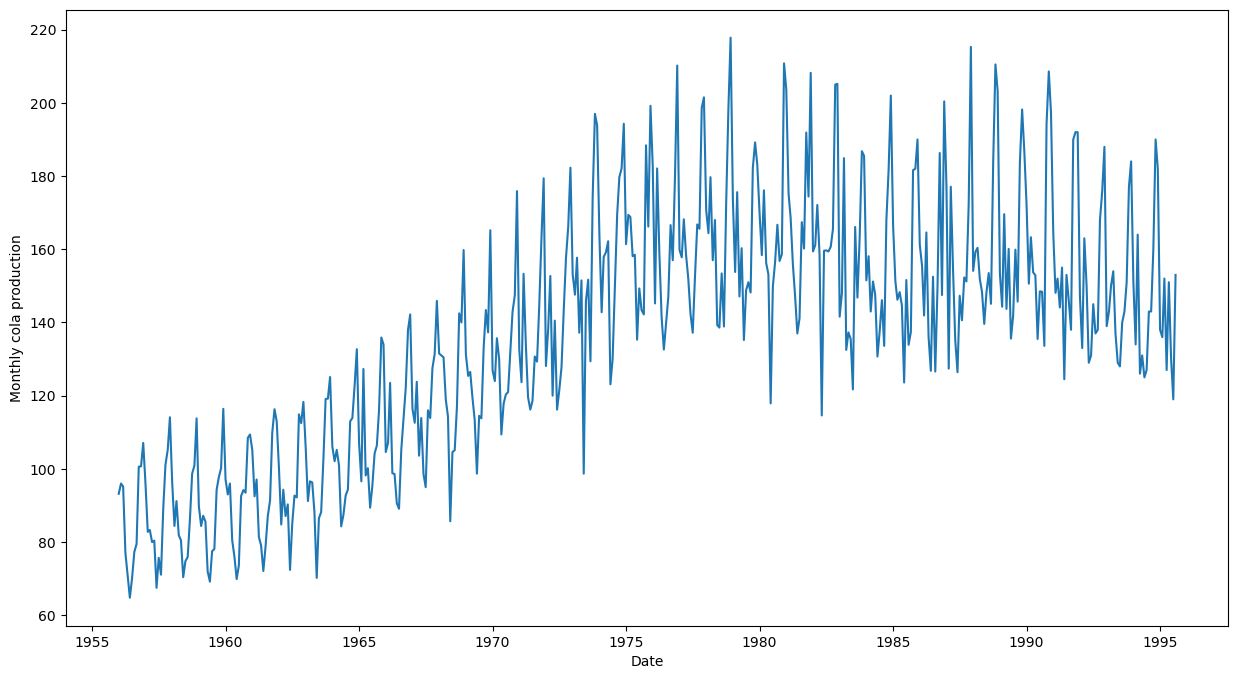

In [23]:
# Visualization
plt.figure(figsize = (15, 8))
sns.lineplot(data = temp_df, x = temp_df.index, y = temp_df["Monthly cola production"])
plt.show()

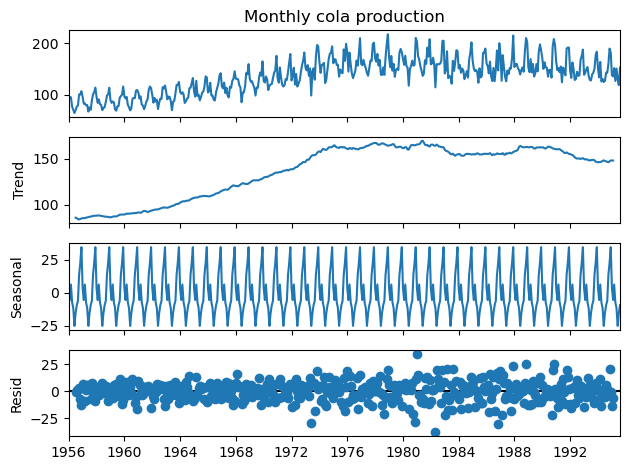

In [25]:
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(temp_df["Monthly cola production"], period = 12)
fig = decomposition.plot()
plt.show()

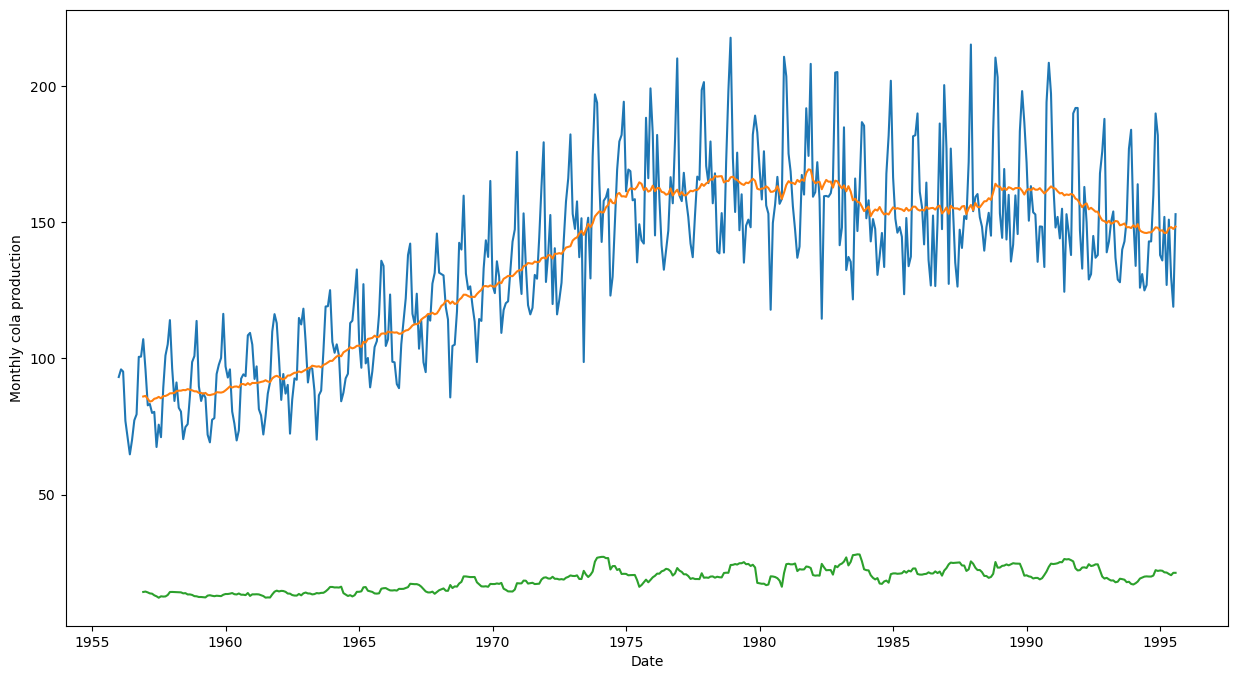

In [37]:
window_var = 12
temp_df["rollMean"] = temp_df["Monthly cola production"].rolling(window = window_var).mean()
temp_df["rollStd"] = temp_df["Monthly cola production"].rolling(window = window_var).std()

plt.figure(figsize = (15, 8))
sns.lineplot(data = temp_df, x = temp_df.index, y = temp_df["Monthly cola production"])
sns.lineplot(data = temp_df, x = temp_df.index, y = temp_df["rollMean"])
sns.lineplot(data = temp_df, x = temp_df.index, y = temp_df["rollStd"])
plt.show()

In [45]:
from statsmodels.tsa.stattools import adfuller

adfTest = adfuller(temp_df["Monthly cola production"])
print(adfTest)
stats = pd.Series(adfTest[0:4], index = ["Test Statistic", "P variable val", "# lags used", "Number of observations"])
print(stats)

for key, values in adfTest[4].items():
    print("criticality", key, ":", values)

(-2.2826614187875816, 0.1776209982913235, 17, 458, {'1%': -3.4447087976702284, '5%': -2.867871300049488, '10%': -2.5701423432047443}, 3463.9034375936567)
Test Statistic             -2.282661
P variable val              0.177621
# lags used                17.000000
Number of observations    458.000000
dtype: float64
criticality 1% : -3.4447087976702284
criticality 5% : -2.867871300049488
criticality 10% : -2.5701423432047443


In [53]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
    dataFrame["rollStd"] = dataFrame[var].rolling(window = 12).std()

    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var])
    stats = pd.Series(adfTest[0:4], index = ['Test Statistic', 'p-value', '#lags used', 'number of observations used'])
    print(stats)

    for key, values in adfTest[4].items():
        print('criticality', key, ":", values)

    sns.lineplot(data = dataFrame, x = dataFrame.index, y = var)
    sns.lineplot(data = dataFrame, x = dataFrame.index, y = 'rollMean')
    sns.lineplot(data = dataFrame, x = dataFrame.index, y = "rollStd")
    plt.show()

In [55]:
temp_df['shift'] = temp_df["Monthly cola production"].shift(1)
temp_df['firstDiff'] = temp_df["Monthly cola production"] - temp_df['shift']
print(temp_df.head(5))

            Monthly cola production  rollMean  rollStd  shift  firstDiff
Date                                                                    
1956-01-01                     93.2       NaN      NaN    NaN        NaN
1956-02-01                     96.0       NaN      NaN   93.2        2.8
1956-03-01                     95.2       NaN      NaN   96.0       -0.8
1956-04-01                     77.1       NaN      NaN   95.2      -18.1
1956-05-01                     70.9       NaN      NaN   77.1       -6.2


C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_3056\266993098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_3056\266993098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["rollStd"] = dataFrame[var].rolling(window = 12).std()


Test Statistic                  -4.915560
p-value                          0.000033
#lags used                      18.000000
number of observations used    446.000000
dtype: float64
criticality 1% : -3.4450973903602367
criticality 5% : -2.868042229965336
criticality 10% : -2.570233448893


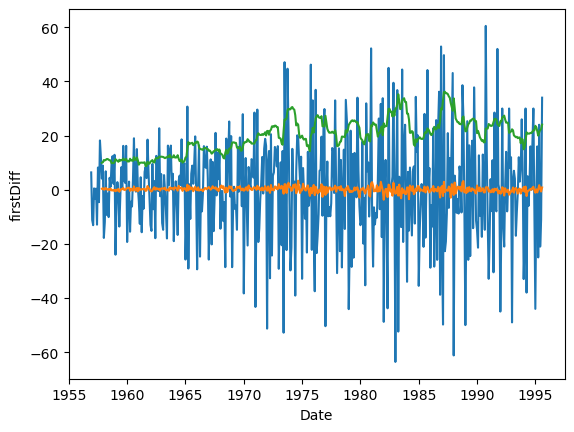

In [57]:
temp_df['shift'] = temp_df["Monthly cola production"].shift(1)
temp_df['firstDiff'] = temp_df["Monthly cola production"] - temp_df['shift']
test_stationarity(temp_df.dropna(), 'firstDiff')

C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_3056\266993098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_3056\266993098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["rollStd"] = dataFrame[var].rolling(window = 12).std()


Test Statistic                  -3.995855
p-value                          0.001432
#lags used                      18.000000
number of observations used    446.000000
dtype: float64
criticality 1% : -3.4450973903602367
criticality 5% : -2.868042229965336
criticality 10% : -2.570233448893


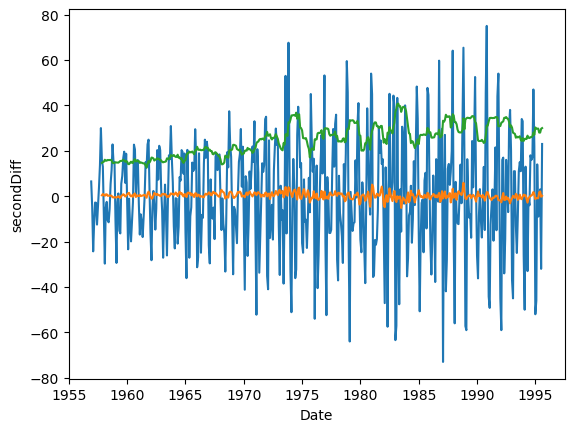

In [59]:
temp_df['shift'] = temp_df["Monthly cola production"].shift(2)
temp_df['secondDiff'] = temp_df["Monthly cola production"] - temp_df['shift']
test_stationarity(temp_df.dropna(), 'secondDiff')

In [61]:
temp_df.head()

Monthly cola production  rollMean  rollStd  shift  firstDiff  \
Date                                                                       
1956-01-01                     93.2       NaN      NaN    NaN        NaN   
1956-02-01                     96.0       NaN      NaN    NaN        2.8   
1956-03-01                     95.2       NaN      NaN   93.2       -0.8   
1956-04-01                     77.1       NaN      NaN   96.0      -18.1   
1956-05-01                     70.9       NaN      NaN   95.2       -6.2   

            secondDiff  
Date                    
1956-01-01         NaN  
1956-02-01         NaN  
1956-03-01         2.0  
1956-04-01       -18.9  
1956-05-01       -24.3